In [1]:
import sys, os

# Parallize
try:
    from mpi4py import MPI
    comm = MPI.COMM_WORLD
    rank = comm.Get_rank()
    size = comm.Get_size()
except ImportError:
    rank = 0
    size = 1

import py21cmfast as p21c

if rank == 0:
    default_cache_direc = p21c.config['direc']
    if os.path.exists(default_cache_direc) and not os.path.exists(default_cache_direc/'wisdoms'):
        os.mkdir(default_cache_direc/'wisdoms')

import shutil

import multiprocessing
from multiprocessing import Pool

import matplotlib.pyplot as plt
from scipy.stats import qmc
import numpy as np
import glob
import h5py
import fcntl
import time

--------------------------------------------------------------------------

  Local host:   atl1-1-02-020-27-1
  Local device: mlx5_0
--------------------------------------------------------------------------
/storage/home/hcoda1/3/bxia34/.conda/envs/21cmFAST/lib/python3.9/site-packages/py21cmfast/_cfg.py:57: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn(
/storage/home/hcoda1/3/bxia34/.conda/envs/21cmFAST/lib/python3.9/site-packages/py21cmfast/_cfg.py:41: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn("Your configuration file is out of date. Updating...")


In [2]:
str_pad_len = 80
str_pad_type = '-'
cache_direc = "_cache" + str(rank)

if not os.path.exists(cache_direc):
    os.mkdir(cache_direc)
p21c.config['direc'] = cache_direc

In [3]:
import py21cmfast as p21c
from py21cmfast import plotting
import os
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import cm
import numpy as np
from scipy.spatial.transform import Rotation
from astropy import units as un
%matplotlib inline

print(f"21cmFAST version is {p21c.__version__}")

21cmFAST version is 3.3.1


In [4]:
user_params = p21c.UserParams(
    HII_DIM=64, BOX_LEN=256, KEEP_3D_VELOCITIES=True
)


/storage/home/hcoda1/3/bxia34/.conda/envs/21cmFAST/lib/python3.9/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to UserParams are not supported: ['KEEP_3D_VELOCITIES']
  warnings.warn(


In [5]:
# lcn = p21c.RectilinearLightconer.with_equal_cdist_slices(
#     min_redshift=7.0,
#     max_redshift=12.0,
#     quantities=('brightness_temp', 'density', 'velocity_z'),
#     resolution=user_params.cell_size,
#     # index_offset=0,
# )

In [6]:
# p21c.run_coeval?

In [7]:
# p21c.run_lightcone?

In [8]:
lightcone = p21c.run_lightcone(
    redshift=8,
    max_redshift=14,
    # Z_HEAT_MAX = 35.0,
    # ZPRIME_STEP_FACTOR = 1.2,#.0199999809265137,
    user_params = user_params,
    lightcone_quantities=('brightness_temp','density'),
)

/storage/home/hcoda1/3/bxia34/.conda/envs/21cmFAST/lib/python3.9/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/storage/home/hcoda1/3/bxia34/.conda/envs/21cmFAST/lib/python3.9/site-packages/py21cmfast/inputs.py:491: UserWarning: The USE_INTERPOLATION_TABLES setting has changed in v3.1.2 to be default True. You can likely ignore this warning, but if you relied onhaving USE_INTERPOLATION_TABLES=False by *default*, please set it explicitly. To silence this warning, set it explicitly to True. Thiswarning will be removed in v4.
  warnings.warn(
/storage/home/hcoda1/3/bxia34/.conda/envs/21cmFAST/lib/python3.9/site-packages/py21cmfast/_utils.py:815: UserWarning: Trying to remove array that isn't yet created: hires_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/storage/home/hcoda1/3/bxia34/.conda/envs/21cmFAST/lib/python3.9/site-packages/py21cmfast/_utils.py:815: User

(<Figure size 1200x600 with 2 Axes>,
 <Axes: xlabel='Redshift', ylabel='y-axis [Mpc]'>)

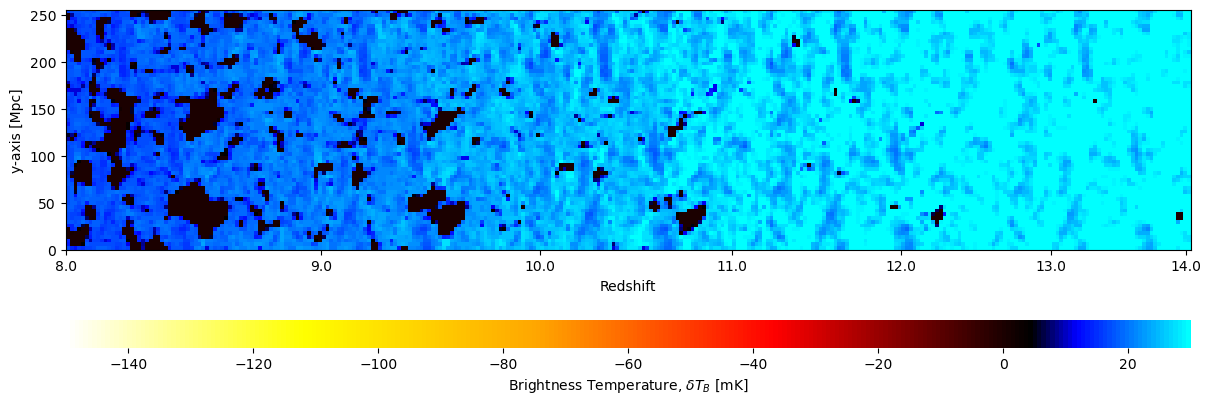

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6), constrained_layout=True)
plotting.lightcone_sliceplot(lightcone, ax=ax, fig=fig)

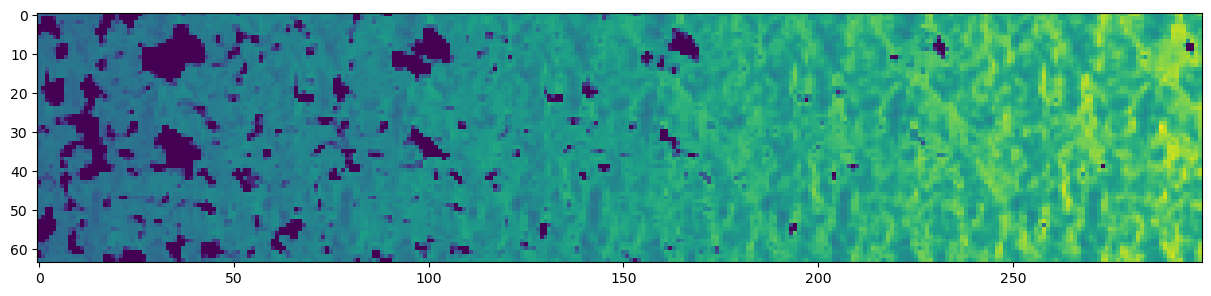

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6), constrained_layout=True)
plt.imshow(lightcone.brightness_temp[0])

In [11]:
lightcone.brightness_temp.shape

(64, 64, 299)

In [12]:
(lightcone.node_redshifts)

[14.060755706842153,
 13.765447047520299,
 13.475928748653654,
 13.192087273868859,
 12.913811312993872,
 12.640991738407001,
 12.373521562241844,
 12.11129589443134,
 11.854211901574486,
 11.602168766609587,
 11.355067649278237,
 11.112811647364493,
 10.875305758694093,
 10.64245684387876,
 10.414173589791023,
 10.19036647375522,
 9.97094772844063,
 9.755831307442971,
 9.544932851540787,
 9.338169655613456,
 9.135460636207869,
 8.93672629974106,
 8.741888711326315,
 8.55087146421052,
 8.363599649810794,
 8.179999828338623,
 8]

In [13]:
lightcone.node_redshifts[0]

14.060755706842153

In [14]:
# lightcone.global_params

In [15]:
lightcone.node_redshifts[-1]

8

In [16]:
lightcone.__dict__.keys()

dict_keys(['redshift', 'random_seed', 'user_params', 'cosmo_params', 'astro_params', 'flag_options', 'node_redshifts', 'cache_files', 'log10_mturnovers', 'log10_mturnovers_mini', 'global_params', 'global_brightness_temp', 'global_xH', 'photon_nonconservation_data', 'brightness_temp', 'density', 'global_quantities', 'lightcones'])

In [17]:
lightcone.flag_options

FlagOptions(FIX_VCB_AVG:False, INHOMO_RECO:False, M_MIN_in_Mass:False, PHOTON_CONS:False, SUBCELL_RSD:False, USE_CMB_HEATING:True, USE_HALO_FIELD:False, USE_LYA_HEATING:True, USE_MASS_DEPENDENT_ZETA:False, USE_MINI_HALOS:False, USE_TS_FLUCT:False)

In [18]:
lightcone.cosmo_params

CosmoParams(OMb:0.04897, OMm:0.3096, POWER_INDEX:0.9665, SIGMA_8:0.8102, hlittle:0.6766)

In [19]:
lightcone.astro_params

AstroParams(ALPHA_ESC:-0.5, ALPHA_STAR:0.5, ALPHA_STAR_MINI:0.5, A_LW:2, A_VCB:1, BETA_LW:0.6, BETA_VCB:1.8, F_ESC10:0.1, F_ESC7_MINI:0.01, F_H2_SHIELD:0, F_STAR10:0.05012, F_STAR7_MINI:0.01, HII_EFF_FACTOR:30, ION_Tvir_MIN:50000, L_X:1e+40, L_X_MINI:1e+40, M_TURN:5.012e+08, NU_X_THRESH:500, N_RSD_STEPS:20, R_BUBBLE_MAX:15, X_RAY_SPEC_INDEX:1, X_RAY_Tvir_MIN:50000, t_STAR:0.5)

In [20]:
# lightcone.node_redshifts

In [21]:
lightcone.redshift

8

In [22]:
lightcone.user_params

/storage/home/hcoda1/3/bxia34/.conda/envs/21cmFAST/lib/python3.9/site-packages/py21cmfast/inputs.py:491: UserWarning: The USE_INTERPOLATION_TABLES setting has changed in v3.1.2 to be default True. You can likely ignore this warning, but if you relied onhaving USE_INTERPOLATION_TABLES=False by *default*, please set it explicitly. To silence this warning, set it explicitly to True. Thiswarning will be removed in v4.
  warnings.warn(


UserParams(BOX_LEN:256, DIM:192, FAST_FCOLL_TABLES:False, HII_DIM:64, HMF:1, MINIMIZE_MEMORY:False, NON_CUBIC_FACTOR:1, NO_RNG:False, N_THREADS:1, PERTURB_ON_HIGH_RES:False, POWER_SPECTRUM:0, USE_2LPT:True, USE_FFTW_WISDOM:False, USE_INTERPOLATION_TABLES:True, USE_RELATIVE_VELOCITIES:False)

In [23]:
lightcone.global_brightness_temp

array([32.92985916, 32.48861313, 32.0306778 , 31.55216217, 31.05138397,
       30.52665138, 29.9757328 , 29.39554596, 28.78336143, 28.13747025,
       27.45823669, 26.74339676, 25.99325943, 25.20596123, 24.38139725,
       23.51885414, 22.61719131, 21.67667961, 20.70597458, 19.69561768,
       18.65116882, 17.56755066, 16.45015717, 15.29522038, 14.11268902,
       12.91145897, 11.68807793])

In [24]:
lightcone.brightness_temp.shape

(64, 64, 299)

In [25]:
lightcone.global_quantities.keys()

dict_keys(['brightness_temp', 'xH_box'])

In [26]:
lightcone.lightcones.keys()

dict_keys(['brightness_temp', 'density'])

In [27]:
lightcone.global_quantities['brightness_temp']

array([32.92985916, 32.48861313, 32.0306778 , 31.55216217, 31.05138397,
       30.52665138, 29.9757328 , 29.39554596, 28.78336143, 28.13747025,
       27.45823669, 26.74339676, 25.99325943, 25.20596123, 24.38139725,
       23.51885414, 22.61719131, 21.67667961, 20.70597458, 19.69561768,
       18.65116882, 17.56755066, 16.45015717, 15.29522038, 14.11268902,
       12.91145897, 11.68807793])

In [28]:
lightcone.lightcones['brightness_temp'].shape

(64, 64, 299)

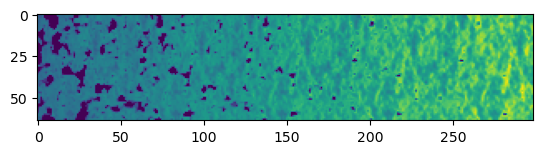

In [29]:
plt.imshow(lightcone.lightcones['brightness_temp'][0])
plt.show()

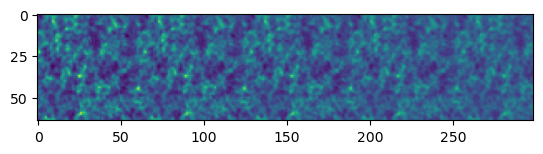

In [30]:
plt.imshow(lightcone.lightcones['density'][1])
plt.show()

In [31]:
for i in range(lightcone.lightcones['brightness_temp'].shape[0]):
    plt.imshow(lightcone.lightcones['brightness_temp'][i])
    plt.savefig(f"lightcone_{i:03d}.png")
    plt.close()

In [32]:
for i in range(lightcone.lightcones['brightness_temp'].shape[-1]):
    plt.imshow(lightcone.lightcones['brightness_temp'][:,:,i])
    plt.savefig(f"coeval_{i:03d}.png")
    plt.close()